
   

![title](./img/ds_em_projetos.png)  




# Bem vindos ao evento Data Science em Projetos

## Dia 01 - Predição de Preços

Nessa primeira live veremos uma aplicação de predição de preços de carros com base em suas características. 

Utilizando algoritmos de regressão consagrados, vamos implementar um modelo e criar uma aplicação e implantar num serviço gratuito na web. Projeto do início ao fim para iniciantes terem um primeiro projeto no portifólio.

Você pode baixar os dados que vamos utilizar nesse projeto diretamente no [Kaggle](https://www.kaggle.com/saisaathvik/used-cars-dataset-from-cardekhocom)

É uma base de um site de venda de carros, com as principais características dos carros e seus preços de venda.

Nosso intuito é criar uma aplicação para a loja de carros. Além da intuição e pesquisa de mercado, é importante para os vendedores da loja terem uma ferramenta automatizada de predição para terem mais um indicador confiável de qual deve ser o preço de venda de cada carro.

Assim como estamos fazendo para carros, podemos abstrair para outras tantas aplicações: preços de imóveis com base nas características, preços de instrumentos musicais, de equipamentos eletrônicos, etc...

O notebook inicial foi obtido nesse [vídeo](https://www.youtube.com/watch?v=L3OtLaCbJC8&list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6&index=8) com esse [código](https://colab.research.google.com/drive/1Nijk_3-qGu660-n0p86vIf-BNGG1e1UN?usp=sharing) Ele está bem básico e acrescentamos o uso de outros algoritmos, cross validation e one hot encoding que não estão lá.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

### Carregar a base de dados!

Sempre gosto de criar uma pastinha "data" pra organizar. Utilizamos pandas pra carregar os dados. Se ainda não conhece, a gente tem dois vídeos introdutórios, acesso [aqui](https://www.youtube.com/watch?v=iOjtCIcU3HQ) e [aqui](https://www.youtube.com/watch?v=5Ja_f8Q3IHw) :)

Os dados foram extraídos de um site de vendas indiano chamado [Cardekho](https://www.cardekho.com/)

In [2]:
# Carregando a base para um dataframe pandas
carros = pd.read_csv('./data/cardekho_imputated.csv')

In [3]:
# olhar as 1as 5 linhas
carros.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# Tirando a 1a coluna
carros = carros.drop(carros.columns[0], axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# Configurações pro pandas mostrar números com duas casas decimais, sem notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
carros.columns

Index(['car_name', 'brand', 'model', 'min_cost_price', 'max_cost_price',
       'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [7]:
# Renomear as colunas para o bom e velho PORTUGA (mas temos que treinar inglês, hein, galera, coloca na lista aí)
carros.columns = ['nome', 
                  'marca', 
                  'modelo', 
                  'preco_minimo_custo', 
                  'preco_maximo_custo', 
                  'idade_veiculo', 
                  'kms_rodados', 
                  'tipo_vendedor', 
                  'tipo_combustivel',
                  'cambio',
                  'consumo', # kms por litro
                  'motor', # cilindradas. Como sei tudo isso?? Só entrar no site e ver a fonte dos dados!!
                  'potencia_maxima', # brake horse power, um tipo de cavalos de potência, mas que leva em conta a fricção
                  'assentos', 
                  'preco_venda']
carros.head()


,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
carros['tipo_combustivel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [9]:
carros['tipo_combustivel'] = carros['tipo_combustivel'].map({'Petrol': 'Gasolina', 'Diesel': 'Diesel', 'CNG': 'GNV', 'LPG': 'GLP', 'Electric': 'Eletrico'})
carros['tipo_combustivel'].unique()

array(['Gasolina', 'Diesel', 'GNV', 'GLP', 'Eletrico'], dtype=object)

In [10]:
# Numero de linhas e colunas
carros.shape

(15411, 15)

In [11]:
# Informacoes basicas das colunas e valores
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                15411 non-null  object 
 1   marca               15411 non-null  object 
 2   modelo              15411 non-null  object 
 3   preco_minimo_custo  15411 non-null  float64
 4   preco_maximo_custo  15411 non-null  float64
 5   idade_veiculo       15411 non-null  int64  
 6   kms_rodados         15411 non-null  int64  
 7   tipo_vendedor       15411 non-null  object 
 8   tipo_combustivel    15411 non-null  object 
 9   cambio              15411 non-null  object 
 10  consumo             15411 non-null  float64
 11  motor               15411 non-null  int64  
 12  potencia_maxima     15411 non-null  float64
 13  assentos            15411 non-null  int64  
 14  preco_venda         15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.8+

In [12]:
# Avaliando valores faltantes
carros.isnull().sum()

nome                  0
marca                 0
modelo                0
preco_minimo_custo    0
preco_maximo_custo    0
idade_veiculo         0
kms_rodados           0
tipo_vendedor         0
tipo_combustivel      0
cambio                0
consumo               0
motor                 0
potencia_maxima       0
assentos              0
preco_venda           0
dtype: int64

In [13]:
# Distribuição de variáveis categóricas
print(carros['tipo_combustivel'].value_counts())
print(carros['tipo_vendedor'].value_counts())
print(carros['cambio'].value_counts())
print(carros['marca'].value_counts())
print(carros['modelo'].value_counts())

Gasolina    7643
Diesel      7419
GNV          301
GLP           44
Eletrico       4
Name: tipo_combustivel, dtype: int64
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: tipo_vendedor, dtype: int64
Manual       12225
Automatic     3186
Name: cambio, dtype: int64
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1


In [14]:
carros.head()

,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Gasolina,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Gasolina,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Gasolina,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Gasolina,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Uma EDA simples pra verificar possíveis correlações e entender melhor a base

In [15]:
carros.describe()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,preco_venda
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,668000.00,872866.67,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,1284000.00,1743000.00,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,988000000.00,91100000.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [16]:
# Poderíamos tratar outliers, ajuda muito no modelo!
carros['preco_venda'].describe(percentiles=[.9])['90%']

1375000.0

In [17]:
preco_percentil_90 = carros['preco_venda'].describe(percentiles=[.9])['90%']
carros.loc[carros['preco_venda'] < preco_percentil_90].describe()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,preco_venda
count,13864.00,13864.00,13864.00,13864.00,13864.00,13864.00,13864.00,13864.00,13864.00
mean,2700872.60,1418572.07,6.16,56369.30,20.19,1387.32,90.71,5.28,563932.48
std,31030606.97,1540938.82,3.06,53107.80,3.98,412.71,27.78,0.76,264334.16
min,311000.00,436000.00,0.00,100.00,7.81,793.00,38.40,0.00,40000.00
25%,640000.00,775000.00,4.00,30000.00,17.40,1197.00,74.00,5.00,365000.00
50%,803000.00,1133805.56,6.00,50000.00,20.14,1248.00,84.00,5.00,525000.00
75%,1061000.00,1617000.00,8.00,71000.00,22.90,1498.00,103.20,5.00,720000.00
max,747300000.00,32700000.00,29.00,3800000.00,33.54,5461.00,364.90,9.00,1370000.00


F:\leon\venvs\ds-projetos-live-01\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco_venda', ylabel='Density'>

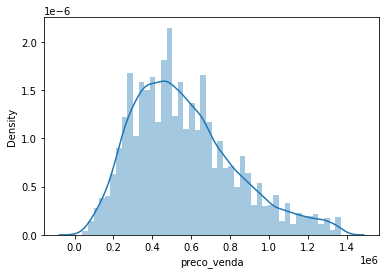

In [18]:
sns.distplot(carros.loc[carros['preco_venda'] < preco_percentil_90, 'preco_venda'])

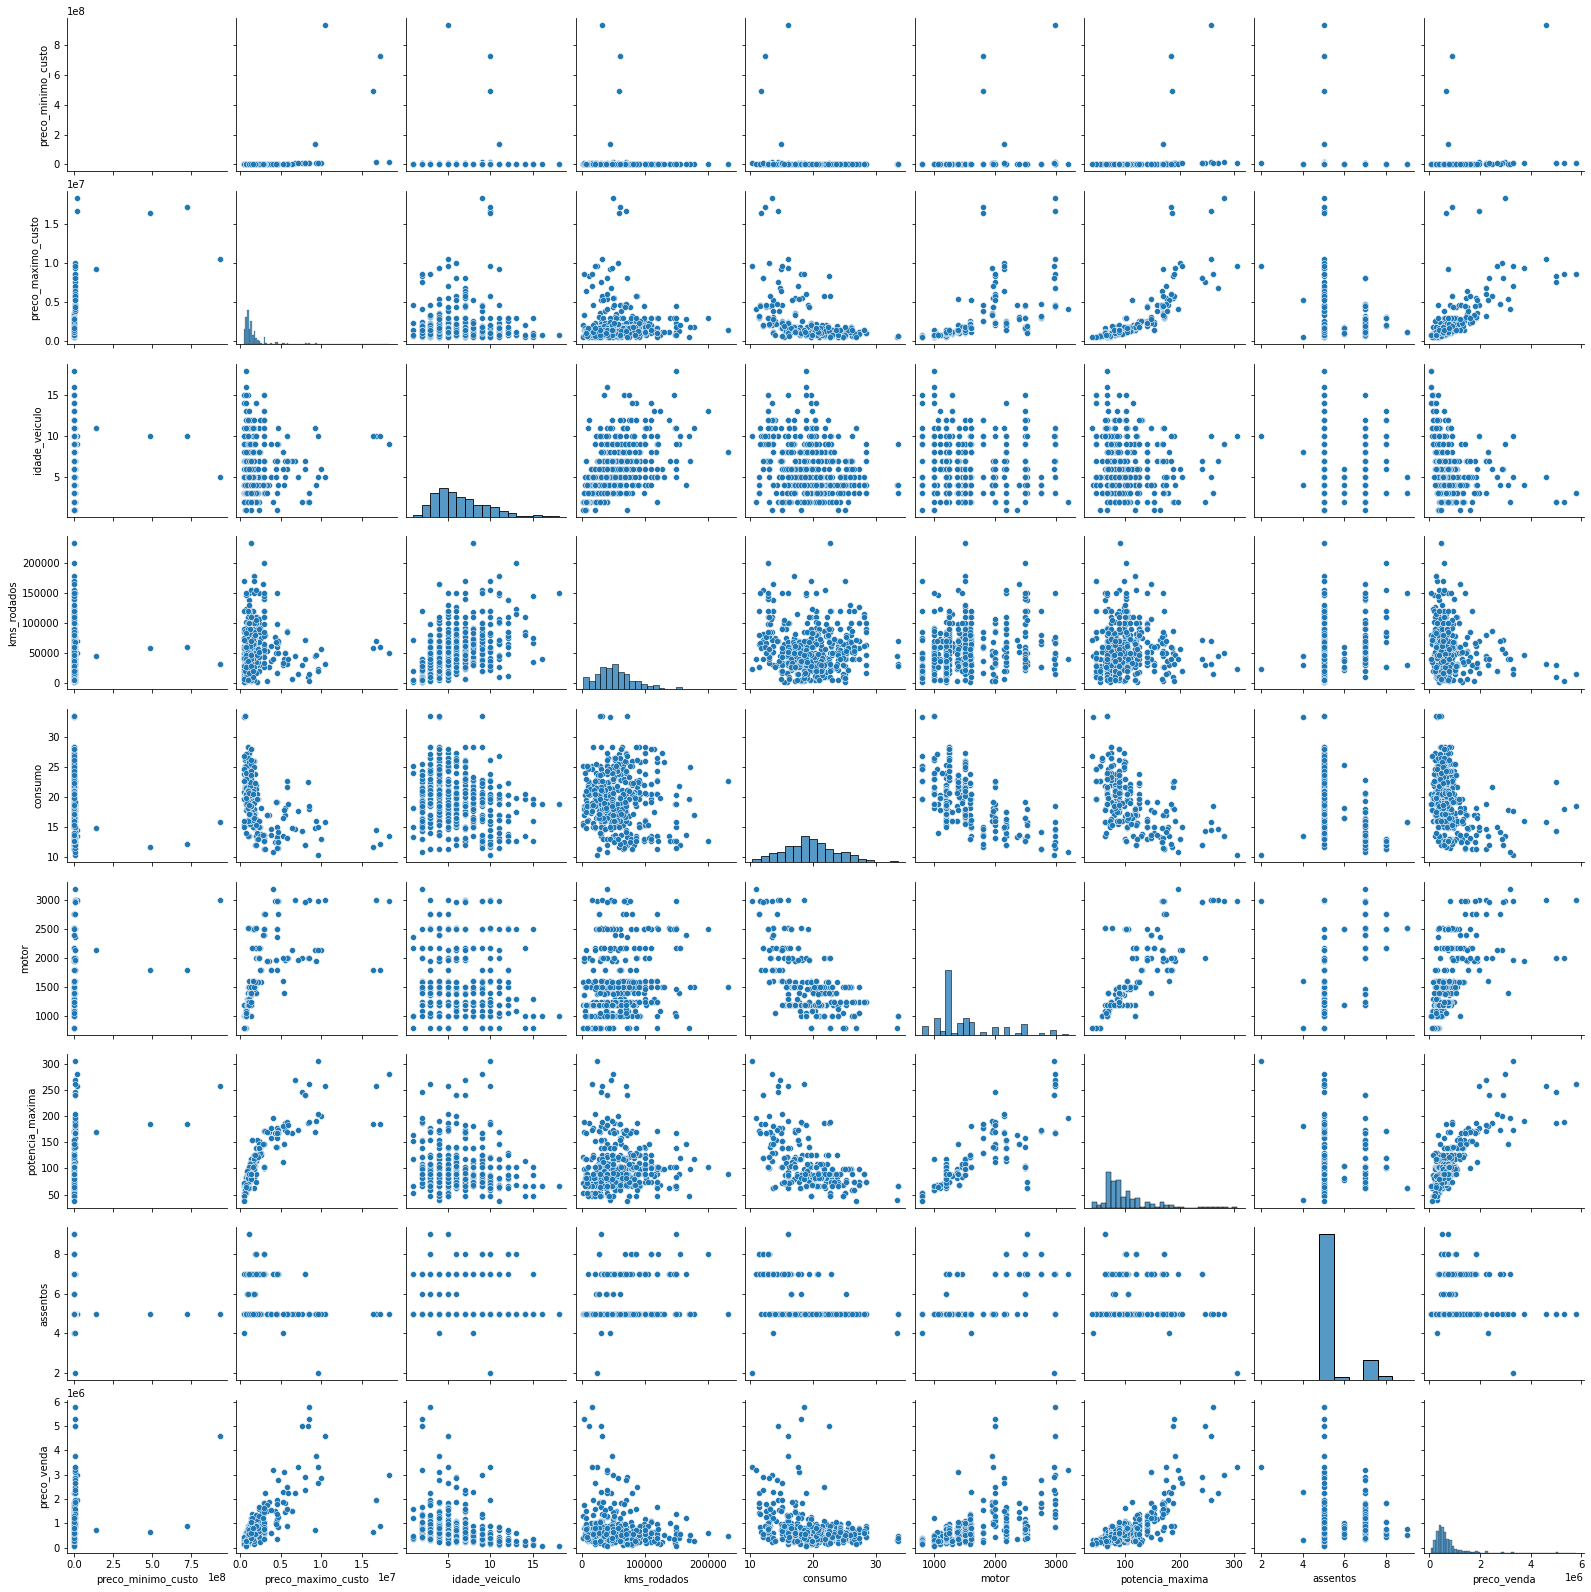

In [19]:
sns.pairplot(carros.sample(500))

### Separando variáveis preditoras e target

In [20]:
X = carros.drop(['nome','modelo','preco_venda'],axis=1)
Y = carros['preco_venda']

In [21]:
print(X)

          marca  preco_minimo_custo  preco_maximo_custo  idade_veiculo  \
0        Maruti           357003.86           465401.54              9   
1       Hyundai           711000.00           748000.00              5   
2       Hyundai           854082.87          1307925.56             11   
3        Maruti           357003.86           465401.54              9   
4          Ford          1014000.00          1379000.00              6   
...         ...                 ...                 ...            ...   
15406   Hyundai           698320.00           729333.33              9   
15407    Maruti           926776.00          1149968.00              2   
15408     Skoda           892632.65          1563551.02              6   
15409  Mahindra          1783000.00          2491000.00              5   
15410     Honda          1330978.36          1707437.40              2   

       kms_rodados tipo_vendedor tipo_combustivel     cambio  consumo  motor  \
0           120000    Individua

In [22]:
print(Y)

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: preco_venda, Length: 15411, dtype: int64


#### Fazendo split (antes de scaling, imputação, codificação de variáveis categóricas!!

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

### Codificar as variáveis categóricas

Os algoritmos entendem números! As variáveis categóricas tem que ser convertidas de alguma forma. Para isso vamos usar o OneHotEncoding, uma forma simples de transformar categorias não ordinais em números.

In [24]:
# Buscando as colunas que não são numéricas
colunas_categoricas = X_train.select_dtypes(include=[object]).columns
colunas_categoricas

Index(['marca', 'tipo_vendedor', 'tipo_combustivel', 'cambio'], dtype='object')

In [25]:
# Criando o objeto que vai transformar nossas colunas categóricas em diversas numéricas (n-1 o número de classes)
ohe = OneHotEncoder(sparse=False, drop='first')

In [26]:
X_train.shape

(13869, 12)

In [27]:
X_train['tipo_combustivel']

10937      Diesel
5370       Diesel
8136     Gasolina
13621      Diesel
11889    Gasolina
           ...   
11798      Diesel
13896    Gasolina
6637       Diesel
2575     Gasolina
7336       Diesel
Name: tipo_combustivel, Length: 13869, dtype: object

In [28]:
ohe.fit_transform(X_train[['tipo_combustivel']])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [29]:
ohe.categories_

[array(['Diesel', 'Eletrico', 'GLP', 'GNV', 'Gasolina'], dtype=object)]

In [30]:
# Transformando as variáveis categóricas em numéricas (com pipeline fica muito mais simples, mas vamos mostrar )

for coluna_categorica in colunas_categoricas:
    colunas_ohe = ohe.fit_transform(X_train[[coluna_categorica]])
    colunas_ohe_teste = ohe.transform(X_test[[coluna_categorica]])
    
    #print(ohe.categories_[0])
    
    categorias_ohe = ohe.categories_[0][1:]
    
    for indice, nome_categoria in enumerate(categorias_ohe):
        df_categorias = pd.DataFrame(data=colunas_ohe[:, indice], columns=[nome_categoria])
        df_categorias_teste = pd.DataFrame(data=colunas_ohe_teste[:, indice], columns=[nome_categoria])
        
        
        X_train[nome_categoria] = colunas_ohe[:, indice]
        X_test[nome_categoria] = colunas_ohe_teste[:, indice]
       
   
    X_train = X_train.drop(coluna_categorica, axis=1)
    X_test = X_test.drop(coluna_categorica, axis=1)

In [31]:
X_train.head()    

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo,Individual,Trustmark Dealer,Eletrico,GLP,GNV,Gasolina,Manual
10937,877000.00,1137000.00,8,75000,25.80,1498,98.60,5,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5370,978964.03,1340179.86,3,24300,28.09,1248,88.50,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
8136,357003.86,465401.54,3,5000,24.70,796,47.30,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
13621,926776.00,1149968.00,7,35000,20.77,1248,88.76,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
11889,853392.16,1361294.12,1,7066,18.15,998,118.35,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [32]:
carros.loc[carros.index == 10937, 'marca'].values , carros.loc[carros.index == 5370, 'marca'].values 

(array(['Honda'], dtype=object), array(['Maruti'], dtype=object))

In [33]:
X_test.head()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo,Individual,Trustmark Dealer,Eletrico,GLP,GNV,Gasolina,Manual
3313,822000.00,1362000.00,8,40000,17.00,1197,80.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
5442,523000.00,656000.00,5,53000,23.10,998,67.04,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1082,675762.05,990132.53,8,80000,23.40,1248,74.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3498,2017158.73,2955126.98,7,86606,12.99,2494,100.60,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5900,698320.00,729333.33,7,70000,20.36,1197,78.90,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00


## Treinar os modelos!

1. Regressão linear

In [34]:
# Criando objeto de regressao linear
mdl_regressao_linear = LinearRegression()

In [35]:
mdl_regressao_linear.fit(X_train, y_train)

LinearRegression()

Validação do modelo com cross validation

In [36]:
# Validacao cruzada com r2 (quanto mais próximo de 1 melhor as variáveis preditoras explicam a variável target)
scores_regressao_linear = cross_val_score(mdl_regressao_linear, X_train, y_train, scoring='r2', cv=5)
scores_regressao_linear

array([0.73249341, 0.75030305, 0.66614506, 0.52993745, 0.7248921 ])

In [37]:
scores_regressao_linear.mean()

0.6807542145647364

2. Random Forest

In [38]:
# Criando objeto de random forest
mdl_random_forest = RandomForestClassifier()

In [39]:
mdl_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# R quadrado
scores_rf = cross_val_score(mdl_random_forest, X_train, y_train, scoring='r2', cv=5)
scores_rf

F:\leon\venvs\ds-projetos-live-01\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.89155817, 0.88754348, 0.82575011, 0.74830945, 0.90815146])

In [41]:
scores_rf.mean()

0.8522625345894923

### Cadê o teste??? Rá, o teste sempre depois de escolher o modelo CAMPEÃO

In [42]:
# Predições na base de teste
predicoes = mdl_random_forest.predict(X_test)

In [43]:
error_score = r2_score(y_test, predicoes)
print("R squared Error : ", error_score)

R squared Error :  0.8782449552786022


### Modelo pronto, validado e testado!!! Hora de "empacotar" pra usar na aplicação

In [44]:
import joblib

with open('./models/rf_model.pkl', 'wb') as arquivo_modelo:
    joblib.dump(mdl_random_forest, arquivo_modelo,compress=3)

In [45]:
with open('./models/linear_model.pkl', 'wb') as arquivo_modelo:
    joblib.dump(mdl_regressao_linear, arquivo_modelo,compress=3)

In [46]:
# exportar base de dados com parquet para utilizar na aplicação
carros.to_parquet('./data/carros.parquet')
